In [2]:
import datetime as dt
from statistics import mean
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm
import portion as P
length_packet = 362

def rtt_plot(df):
    l1 = []
    l2 = []
    for i in tqdm(range(len(df))):
        if not np.isnan(df.loc[i, "tcp.analysis.ack_rtt"]):
            l1.append(df.loc[i, "frame.time"])
            l2.append(df.loc[i, "tcp.analysis.ack_rtt"])
    print("mean:", np.mean(l2))
    plt.plot(l1, l2)
    plt.show()



def latency_impulse(latency_list, t):
    return sum(latency_list[:, 0] > t) / len(latency_list)

def read_pcapcsv(filename):
    # f = open(filename, "r", encoding='utf8')
    # l = f.readline()
    # while l:
    #     l = l.split('@')
    #     # print(len(l), l)
    #     if len(l) != 13:
    #         print(len(l), l)
    #     l = f.readline()    
    df = pd.read_csv(filename, sep='@')
    df.loc[:, "frame.time"] = pd.to_datetime(df.loc[:, r"frame.time"]).dt.tz_localize(None)
    return df




In [11]:
filepath = r'C:\Users\User\Desktop\data\videostreaming_pcap.csv'
df = read_pcapcsv(filepath)

c:\Users\User\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [12]:
df

,frame.number,frame.time,ip.src,ip.dst,_ws.col.Protocol,frame.len,tcp.analysis.acks_frame,tcp.len,tcp.analysis.ack_rtt,tcp.srcport,tcp.dstport,tcp.analysis.bytes_in_flight,_ws.col.Info
0,1,2022-05-07 19:59:32.968368,49.216.182.54,192.168.1.248,MPTCP,88,NaN,0,NaN,1640,1935,NaN,"1640 → 1935 [FIN, ACK] Seq=1 Ack=1 Win=12302 L..."
1,2,2022-05-07 19:59:32.975050,192.168.1.248,49.216.182.54,MPTCP,88,1.0,0,0.006682,1935,1640,NaN,"1935 → 1640 [FIN, ACK] Seq=1 Ack=2 Win=1002 Le..."
2,3,2022-05-07 19:59:32.994758,49.216.182.54,192.168.1.248,MPTCP,76,2.0,0,0.019708,1640,1935,NaN,1640 → 1935 [ACK] Seq=2 Ack=2 Win=12302 Len=0 ...
3,4,2022-05-07 19:59:32.995748,49.216.182.54,192.168.1.248,MPTCP,76,NaN,0,NaN,1640,1935,NaN,[TCP Dup ACK 3#1] 1640 → 1935 [ACK] Seq=2 Ack=...
4,5,2022-05-07 19:59:32.995766,192.168.1.248,49.216.182.54,TCP,56,NaN,0,NaN,1935,1640,NaN,1935 → 1640 [RST] Seq=2 Win=0 Len=0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188865,188866,2022-05-07 20:01:21.743922,192.168.1.248,192.168.1.1,TCP,56,NaN,0,NaN,1935,40624,NaN,1935 → 40624 [RST] Seq=3591 Win=0 Len=0
188866,188867,2022-05-07 20:01:21.744059,140.112.20.183,192.168.1.248,TCP,62,NaN,0,NaN,1935,40624,NaN,1935 → 40624 [RST] Seq=3591 Win=0 Len=0
188867,188868,2022-05-07 20:01:21.744345,49.216.182.54,192.168.1.248,MPTCP,76,188839.0,0,0.018969,1442,1935,NaN,1442 → 1935 [ACK] Seq=3447 Ack=16481954 Win=15...
188868,188869,2022-05-07 20:01:21.744358,192.168.1.248,49.216.182.54,RTMP,599,NaN,511,NaN,1935,1442,511.0,Video Data


In [15]:
df.loc[0, ["ip.src", "ip.dst"]]

ip.src    49.216.182.54
ip.dst    192.168.1.248
Name: 0, dtype: object

In [18]:
pset = set()
for i in tqdm(range(len(df))):
    pset.add((df.loc[i, "ip.src"], df.loc[i, "ip.dst"]))
print(pset)

100%|██████████| 188870/188870 [00:02<00:00, 85018.86it/s]

{('192.168.1.1', '192.168.1.248'), ('192.168.1.248', '101.10.98.243'), ('101.10.98.243', '192.168.1.248'), ('192.168.1.248', '140.112.20.183'), ('192.168.1.248', '192.168.1.1'), ('140.112.20.183', '192.168.1.248'), ('49.216.182.54', '192.168.1.248'), ('192.168.1.248', '49.216.182.54')}


In [25]:
begin_time = df.loc[0, "frame.time"]
end_time = df.loc[len(df)-1, "frame.time"]

In [83]:
rtt_list_dict = {}
all_rtt_list = []
for i in tqdm(range(len(df))):
    if df.loc[i, "ip.src"] != '192.168.1.1' and df.loc[i, "ip.src"] != '140.112.20.183' and df.loc[i, "ip.dst"] == '192.168.1.248':
        if df.loc[i, "ip.src"] not in rtt_list_dict:
            rtt_list_dict[df.loc[i, "ip.src"]] = []
        if not np.isnan(df.loc[i, "tcp.analysis.ack_rtt"]):
            rtt_list_dict[df.loc[i, "ip.src"]].append((df.loc[i, "frame.time"], df.loc[i, "tcp.analysis.ack_rtt"]))
            all_rtt_list.append((df.loc[i, "frame.time"], df.loc[i, "tcp.analysis.ack_rtt"]))

for src_ip in rtt_list_dict:
    rtt_list_dict[src_ip] = np.array(rtt_list_dict[src_ip])
    rtt_list_dict[src_ip][:, 1] *= 1000
    all_rtt_list = np.array(all_rtt_list)
    all_rtt_list[:, 1] *= 1000
    print(src_ip, len(rtt_list_dict[src_ip]))

all_rtt_list = np.array(all_rtt_list)
all_rtt_list[:, 1] *= 1000



100%|██████████| 188870/188870 [00:03<00:00, 48653.44it/s]


49.216.182.54 6527
101.10.98.243 13280


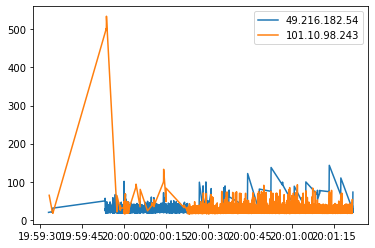

In [68]:
for src_ip in rtt_list_dict:
    plt.plot(rtt_list_dict[src_ip][:, 0], rtt_list_dict[src_ip][:, 1], label = src_ip)
plt.legend()

{'49.216.182.54': array([[Timestamp('2022-05-07 20:01:21.744358'), nan]], dtype=object),
 '101.10.98.243': array([[Timestamp('2022-05-07 20:01:21.592559'), nan]], dtype=object)}

In [81]:
byte_in_flight_dict = {}
all_byte_in_flight_list = []
for i in tqdm(range(len(df))):
    if df.loc[i, "ip.dst"] != '192.168.1.1' and df.loc[i, "ip.dst"] != '140.112.20.183' and df.loc[i, "ip.src"] == '192.168.1.248':
        if df.loc[i, "ip.dst"] not in byte_in_flight_dict:
            byte_in_flight_dict[df.loc[i, "ip.dst"]] = []
        if not np.isnan(df.loc[i, "tcp.analysis.bytes_in_flight"]):
            byte_in_flight_dict[df.loc[i, "ip.dst"]].append((df.loc[i, "frame.time"], df.loc[i, "tcp.analysis.bytes_in_flight"]))
            all_byte_in_flight_list.append()

for dst_ip in byte_in_flight_dict:
    byte_in_flight_dict[dst_ip] = np.array(byte_in_flight_dict[dst_ip])
    print(dst_ip, len(byte_in_flight_dict[dst_ip]))



100%|██████████| 188870/188870 [00:04<00:00, 43517.19it/s]

49.216.182.54 12949
101.10.98.243 25970


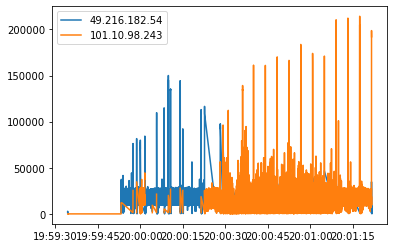

In [55]:
for dst_ip in byte_in_flight_dict:
    plt.plot(byte_in_flight_dict[dst_ip][:, 0], byte_in_flight_dict[dst_ip][:, 1], label = dst_ip)
plt.legend()

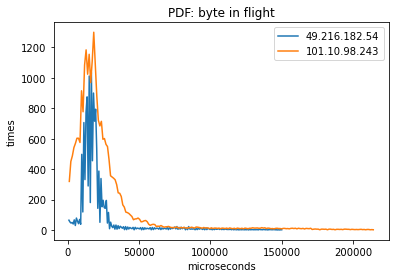

In [78]:
for dst_ip in byte_in_flight_dict:
    # plt.plot(byte_in_flight_dict[dst_ip][:, 0], byte_in_flight_dict[dst_ip][:, 1], label = dst_ip)
    plt.title("PDF: byte in flight")
    hist, bin_edge = np.histogram(byte_in_flight_dict[dst_ip][:, 1], bins = 200)
    plt.xlabel("microseconds")
    plt.ylabel("times")
    plt.plot(bin_edge[1:], hist, label=dst_ip)
plt.legend()

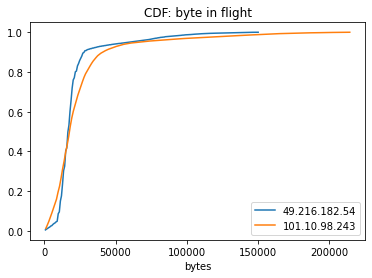

In [82]:
plt.title("CDF: byte in flight")
for dst_ip in byte_in_flight_dict:
    hist, bin_edge = np.histogram(byte_in_flight_dict[dst_ip][:, 1], bins = 200)
    cdf = np.cumsum(hist/sum(hist))
    plt.xlabel("bytes")
    plt.plot(bin_edge[1:],cdf,label = dst_ip)

    # plt.plot(bin_edge[1:], hist, label=dst_ip)
plt.legend()

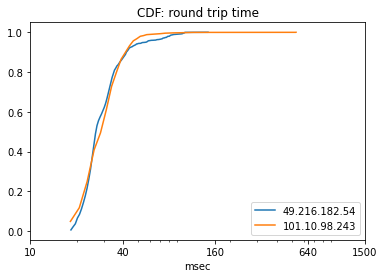

In [74]:
plt.title("CDF: round trip time")

for dst_ip in rtt_list_dict:
    hist, bin_edge = np.histogram(rtt_list_dict[dst_ip][:, 1], bins = 200)
    cdf = np.cumsum(hist/sum(hist))
    plt.plot(bin_edge[1:],cdf,label = dst_ip)
    
    # plt.ylabel("times")
plt.xlabel("msec")
plt.xscale("log")
plt.xticks([10, 40, 160, 640, 1500], [10, 40, 160, 640, 1500])
plt.legend()


In [3]:
filepath = r'C:\Users\User\Desktop\data\client_video_streaming_pcap.csv'
df = read_pcapcsv(filepath)

c:\Users\User\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname CST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [4]:
df

,frame.number,frame.time,ip.src,ip.dst,_ws.col.Protocol,frame.len,tcp.analysis.acks_frame,tcp.len,tcp.analysis.ack_rtt,tcp.srcport,tcp.dstport,tcp.analysis.bytes_in_flight,_ws.col.Info
0,1,2022-05-07 19:57:36.547063,140.112.20.183,192.168.42.186,RTMP,106,NaN,18,NaN,1935,49100,18.0,Ping Request
1,2,2022-05-07 19:57:36.547267,192.168.42.186,140.112.20.183,MPTCP,89,1.0,1,0.000204,49100,1935,1.0,"49100 → 1935 [PSH, ACK] Seq=1 Ack=19 Win=12302..."
2,3,2022-05-07 19:57:36.573947,140.112.20.183,192.168.42.186,MPTCP,76,2.0,0,0.026680,1935,49100,NaN,1935 → 49100 [ACK] Seq=19 Ack=2 Win=1002 Len=0...
3,4,2022-05-07 19:57:36.574001,192.168.42.186,140.112.20.183,MPTCP,94,NaN,6,NaN,49100,1935,6.0,"49100 → 1935 [PSH, ACK] Seq=2 Ack=19 Win=12302..."
4,5,2022-05-07 19:57:36.592932,140.112.20.183,192.168.42.186,MPTCP,76,4.0,0,0.018931,1935,49100,NaN,1935 → 49100 [ACK] Seq=19 Ack=8 Win=1002 Len=0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58815,58816,2022-05-07 20:01:21.736346,140.112.20.183,192.168.42.186,RTMP,1426,NaN,1338,NaN,1935,49112,1338.0,Unknown (0x0)|Unknown (0x6f)
58816,58817,2022-05-07 20:01:21.757463,140.112.20.183,192.168.42.186,RTMP,637,NaN,549,NaN,1935,49112,1887.0,Unknown (0x0)
58817,58818,2022-05-07 20:01:21.757497,192.168.42.186,140.112.20.183,MPTCP,76,58817.0,0,0.000034,49112,1935,NaN,49112 → 1935 [ACK] Seq=3447 Ack=16481954 Win=1...
58818,58819,2022-05-07 20:01:21.776504,140.112.20.183,192.168.42.186,RTMP,599,NaN,511,NaN,1935,49112,511.0,Video Data


In [60]:
def goodput(rxdf):
    all_goodput_list = []
    goodput_dict = {}
    begin_time = rxdf.loc[0, "frame.time"]
    onesecond = dt.timedelta(seconds = 0.5)
    count = 0
    for i in tqdm(range(len(rxdf))):
        if not np.isnan(rxdf.loc[i, "tcp.len"]) and rxdf.loc[i, "ip.src"] == '140.112.20.183':
            count += rxdf.loc[i, "frame.len"]
        if rxdf.loc[i, "frame.time"] - begin_time >= onesecond and rxdf.loc[i, "ip.src"] == '140.112.20.183':
            # all_goodput_list.append((begin_time, count))
            if rxdf.loc[i, "ip.dst"] not in goodput_dict:
                goodput_dict[rxdf.loc[i, "ip.dst"]] = []
            goodput_dict[rxdf.loc[i, "ip.dst"]].append(((rxdf.loc[i, "frame.time"] - rxdf.loc[0, "frame.time"]).total_seconds(), count))
            all_goodput_list.append(((rxdf.loc[i, "frame.time"] - rxdf.loc[0, "frame.time"]).total_seconds(), count))
            begin_time = rxdf.loc[i, "frame.time"]
            count = 0
    for dst_ip in goodput_dict:
        goodput_dict[dst_ip] = np.array((goodput_dict[dst_ip]))
    return np.array(all_goodput_list), goodput_dict

In [61]:
allgoodput_list, goodput_dict = goodput(df)

100%|██████████| 58820/58820 [00:02<00:00, 23447.11it/s]


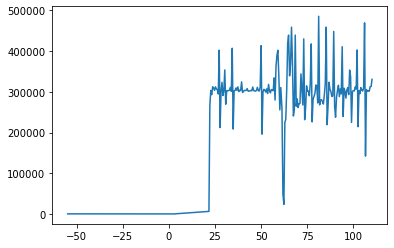

In [62]:
plt.plot(allgoodput_list[:, 0]-115, allgoodput_list[:, 1])

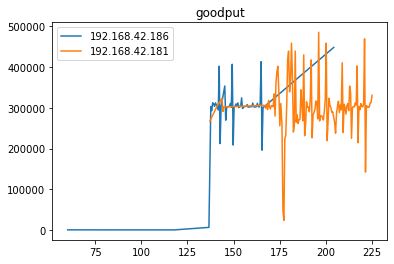

In [63]:
for dst_ip in goodput_dict:
    plt.title("goodput")
    plt.plot(goodput_dict[dst_ip][:, 0], goodput_dict[dst_ip][:, 1], label = dst_ip)
plt.legend()
